### transforms

In [2]:
from torchvision import transforms
# import tensorflow as tf
from PIL import Image

from torch.utils.tensorboard import SummaryWriter


# python的用法 -> tensor 數據類型
# 通過 transforms.ToTensor 去看兩個問題
# 1. transforms 被如何使用
# 2. 為甚麼我們需要 Tensor 數據類型


# 常見的 Transforms 
# 1. 輸入 *PIL -> Image.open()
# 2. 輸出 *tensor -> ToTensor
# 3. 作用 *narrays -> cv.imread()


torch.Size([3, 200, 200])


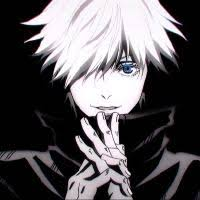

In [3]:
# 絕對路徑
img_path_abs = r"D:\python_workspace\DeepLearning-ds-fundamental\Pytorch\basic\5條.jpg"
img_path = "./5條.jpg"

img = Image.open(img_path)
tensor_trans = transforms.ToTensor()
tensor_img = tensor_trans(img)

print(tensor_img.shape)
img


In [6]:
import cv2

cv_img = cv2.imread(img_path)
writer = SummaryWriter("logs")

#1 transforms 這如何使用 (python)
tensor_trans = transforms.ToTensor()
tensor_img = tensor_trans(img)

writer.add_image("Tensor_img", tensor_img)
writer.close()

# CMD 指令: tensorboard --logdir=logs --port=6007


## call function

In [19]:
class Person:
    def __call__(self, name):
        print("__call__: " + "hello " + name)
    
    def hello(self, name):
        print("hello " + name)

person = Person()
person("leo")
person.hello("leo")



__call__: hello leo
hello leo


## ToTensor && Normalize && Resize

In [1]:
from PIL import Image
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
from datetime import datetime
import os
import shutil



## subdirectory

In [22]:
# subdirectory
now = datetime.now()
logdir = "pytorch_logs/" + now.strftime("%Y%m%d-%H%M%S") + "/"

# Check if the directoryexists
if os.path.exists(logdir):
    # Delete the directory and all its contents
    shutil.rmtree(logdir)

# recreate the directory if plan to continue logging
os.makedirs(logdir, exist_ok=True)



## summary writter
### 資料紀錄器

In [24]:
writter = SummaryWriter(logdir)
# writter.flush()
img = Image.open(img_path)
print(img)


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x18911DD01F0>


### ToTensor
### tensor 轉換器

In [25]:
# ToTensor
trans_totensor = transforms.ToTensor()
img_tensor = trans_totensor(img)
writter.add_image("ToTensor", img_tensor, 0)

writter.close()


### Normalize

In [26]:
# Normalize
trans_norm = transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
img_norm = trans_norm(img_tensor)
print(img_norm[0])
writter.add_image("Normalize", img_norm, 1)

writter.close()

tensor([[0.9686, 0.9216, 0.9059,  ..., 0.9216, 0.8667, 0.9686],
        [0.8667, 0.3647, 0.3176,  ..., 0.0353, 0.1059, 0.8588],
        [0.9922, 0.2863, 0.3961,  ..., 0.1922, 0.1373, 0.9294],
        ...,
        [0.9843, 0.4510, 0.4118,  ..., 0.2471, 0.2549, 0.9843],
        [0.9059, 0.3098, 0.2392,  ..., 0.1137, 0.1686, 0.8745],
        [0.9608, 0.8431, 0.9373,  ..., 0.9686, 0.8824, 0.9843]])


### Resize

In [27]:
# resize
print("before resize", img.size)
# img PIL -> resize -> img_resize PIL
trans_resize = transforms.Resize((512,512))
img_resize = trans_resize(img)
# img_resize PIL -> totensor -> img_resize tensor
img_resize = trans_totensor(img_resize)
print("after resize",img_resize.shape)
writter.add_image("Resize", img_resize, 2)

writter.close()

before resize (500, 333)
after resize torch.Size([3, 512, 512])


### Compose - resize -2

In [28]:
# compose - resize -2
trans_resize_2 = transforms.Resize(512)
# PIL -> PIL -> tensor
trans_compose = transforms.Compose([trans_resize_2, trans_totensor])
img_resize_2 = trans_compose(img)
writter.add_image("Resize-2", img_resize_2, 3)

writter.close()

### RandomCorp
### 隨機裁切

In [30]:
trans_random = transforms.RandomCrop(512)
trans_compose_2 = transforms.Compose([trans_resize_2, trans_random, trans_totensor])

for i in range(10):
    img_crop = trans_compose_2(img)
    writter.add_image("RandomCrop", img_crop, i)

writter.close()
